In [132]:
import nltk
import re
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import os
os.chdir(r"C:\Users\lenovo\Desktop\Praxis\Text analysis")

In [133]:
train=pd.read_csv('train.csv')
test=pd.read_csv('US_covid19Tweets.csv')

In [134]:
train

,id,text,Label
0,1,The #coronavirus is the best deterrent for ext...,0
1,2,"Well, shit. #COVID19 #smalltown #ShelterInPlac...",0
2,3,"Trying to keep our performers, performing duri...",0
3,4,May I vent?? Re: #Coronavirus Just give me the...,0
4,5,German Chancellor Angela Merkel is awaiting he...,0
...,...,...,...
1695,1696,I’m just one #coronavirus away from my goal we...,0
1696,1697,https://t.co/UtsRhujpN9\n#CoronaVirusSA #COVID...,0
1697,1698,"As a service to the #Twittersphere , I offer y...",0
1698,1699,If you are “pro profit” more than “pro life” :...,0


In [135]:
train[train['Label'] == 0].head(10)

,id,text,Label
0,1,The #coronavirus is the best deterrent for ext...,0
1,2,"Well, shit. #COVID19 #smalltown #ShelterInPlac...",0
2,3,"Trying to keep our performers, performing duri...",0
3,4,May I vent?? Re: #Coronavirus Just give me the...,0
4,5,German Chancellor Angela Merkel is awaiting he...,0
5,6,Sidewalk wisdom in #NYC during the time and #c...,0
6,7,@petersmith7012 @short2strings @bprophetable @...,0
7,8,Doing a little face time with Mr. Patrick toda...,0
8,9,WHO: virus can be characterized as a pandemic ...,0
9,10,2/2 ... but he also used the #Covid_19🦠 for hi...,0


In [136]:
train[train['Label'] == 1].head(10)

,id,text,Label
30,31,See how my University management @okstate help...,1
64,65,I NEVER realized till #CoronaVirus how much I ...,1
70,71,🦠 How to Make a Face Mask during the #Coronavi...,1
89,90,"Lastly, we may be #SocialDistancing but our co...",1
139,140,#LunaFête is practicing her #socialdistancing ...,1
164,165,“I would shake your hand but I don’t do that a...,1
172,173,Facts matter. In Codogno Italy 100% of the pop...,1
173,174,Self Isolation is needed because #COVIDー19 #co...,1
196,197,"""Coronavirus: Spain expected to announce lockd...",1
201,202,#shortage #Covid_19 #CoronavirusPandemic #Heal...,1


In [137]:
train.shape, test.shape

((1700, 3), (162485, 1))

In [138]:
train["Label"].value_counts()

0    1572
1     128
Name: Label, dtype: int64

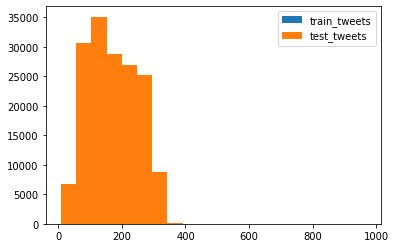

In [139]:
length_train = train['text'].str.len() 
length_test = test['text'].str.len() 
plt.hist(length_train, bins=20, label="train_tweets") 
plt.hist(length_test, bins=20, label="test_tweets") 
plt.legend() 
plt.show()

### data cleaning

In [140]:
combi = train.append(test, ignore_index=True) 
combi.shape

C:\Users\kunal\Anaconda3\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


(164185, 3)

In [141]:
# Given below is a user-defined function to remove unwanted text patterns from the tweets.
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt 

In [142]:
#1. Removing Twitter Handles (@user)
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['text'], "@[\w]*") 
combi.head()

,Label,id,text,tidy_tweet
0,0.0,1.0,The #coronavirus is the best deterrent for ext...,The #coronavirus is the best deterrent for ext...
1,0.0,2.0,"Well, shit. #COVID19 #smalltown #ShelterInPlac...","Well, shit. #COVID19 #smalltown #ShelterInPlac..."
2,0.0,3.0,"Trying to keep our performers, performing duri...","Trying to keep our performers, performing duri..."
3,0.0,4.0,May I vent?? Re: #Coronavirus Just give me the...,May I vent?? Re: #Coronavirus Just give me the...
4,0.0,5.0,German Chancellor Angela Merkel is awaiting he...,German Chancellor Angela Merkel is awaiting he...


In [143]:
#2. Removing Punctuations, Numbers, and Special Characters
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ") 
combi.head(10)

,Label,id,text,tidy_tweet
0,0.0,1.0,The #coronavirus is the best deterrent for ext...,The #coronavirus is the best deterrent for ext...
1,0.0,2.0,"Well, shit. #COVID19 #smalltown #ShelterInPlac...",Well shit #COVID #smalltown #ShelterInPlac...
2,0.0,3.0,"Trying to keep our performers, performing duri...",Trying to keep our performers performing duri...
3,0.0,4.0,May I vent?? Re: #Coronavirus Just give me the...,May I vent Re #Coronavirus Just give me the...
4,0.0,5.0,German Chancellor Angela Merkel is awaiting he...,German Chancellor Angela Merkel is awaiting he...
5,0.0,6.0,Sidewalk wisdom in #NYC during the time and #c...,Sidewalk wisdom in #NYC during the time and #c...
6,0.0,7.0,@petersmith7012 @short2strings @bprophetable @...,Hospital beds per capita doesn t really ma...
7,0.0,8.0,Doing a little face time with Mr. Patrick toda...,Doing a little face time with Mr Patrick toda...
8,0.0,9.0,WHO: virus can be characterized as a pandemic ...,WHO virus can be characterized as a pandemic ...
9,0.0,10.0,2/2 ... but he also used the #Covid_19🦠 for hi...,but he also used the #Covid for hi...


In [144]:
#3. Removing Short Words
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi.head()

,Label,id,text,tidy_tweet
0,0.0,1.0,The #coronavirus is the best deterrent for ext...,#coronavirus best deterrent extramarital affai...
1,0.0,2.0,"Well, shit. #COVID19 #smalltown #ShelterInPlac...",Well shit #COVID #smalltown #ShelterInPlace https
2,0.0,3.0,"Trying to keep our performers, performing duri...",Trying keep performers performing during #COVI...
3,0.0,4.0,May I vent?? Re: #Coronavirus Just give me the...,vent #Coronavirus Just give facts cheerleading...
4,0.0,5.0,German Chancellor Angela Merkel is awaiting he...,German Chancellor Angela Merkel awaiting #COVI...


In [145]:
#4. Text Normalization
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 
tokenized_tweet.head()

0    [#coronavirus, best, deterrent, extramarital, ...
1    [Well, shit, #COVID, #smalltown, #ShelterInPla...
2    [Trying, keep, performers, performing, during,...
3    [vent, #Coronavirus, Just, give, facts, cheerl...
4    [German, Chancellor, Angela, Merkel, awaiting,...
Name: tidy_tweet, dtype: object

In [146]:
# normalize the tokenized tweets.
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
combi['tidy_tweet'] = tokenized_tweet

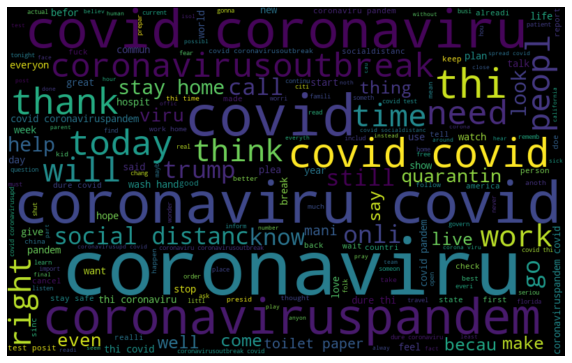

In [147]:
#Understanding the common words used in the tweets: WordCloud
all_words = ' '.join([text for text in combi['tidy_tweet']]) 
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

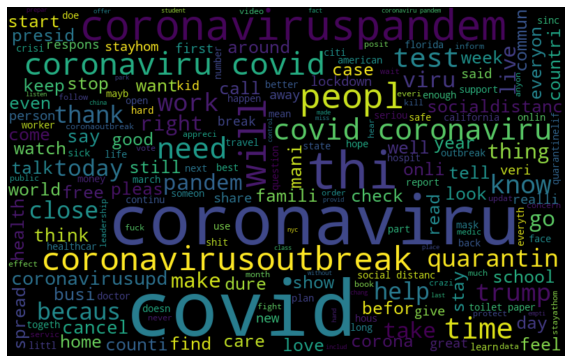

In [148]:
#Words in non remedies tweets
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['Label'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

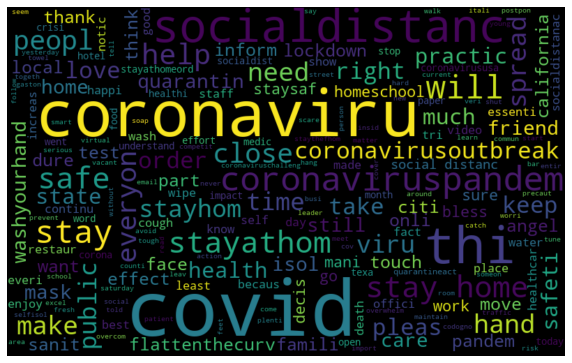

In [149]:
#Words in remedy tweets
remedy_words = ' '.join([text for text in combi['tidy_tweet'][combi['Label'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(remedy_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [150]:
#Understanding the impact of Hashtags on tweets sentiment
# function to collect hashtags 
def hashtag_extract(x):    
    hashtags = []    
    # Loop over the words in the tweet    
    for i in x:        
        ht = re.findall(r"#(\w+)", i)        
        hashtags.append(ht)     
    return hashtags
# extracting hashtags from non remedy tweets 
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['Label'] == 0]) 
# extracting hashtags from remedy tweets 
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['Label'] == 1]) 
# unnesting list 
HT_regular = sum(HT_regular,[]) 
HT_negative = sum(HT_negative,[])

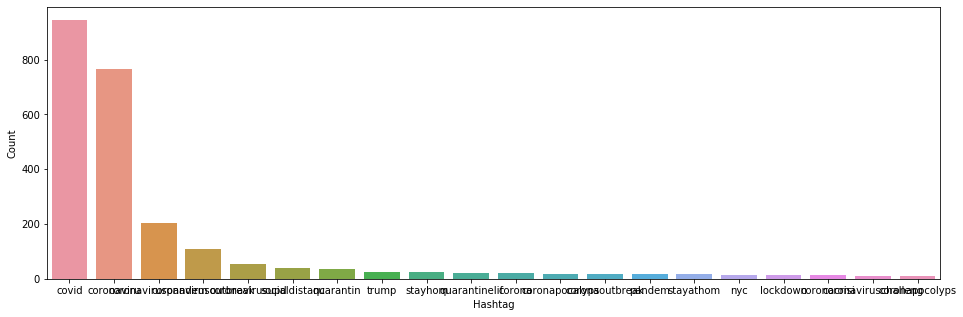

In [151]:
#Non-remedy Tweets
a = nltk.FreqDist(HT_regular) 
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count') 
plt.show()

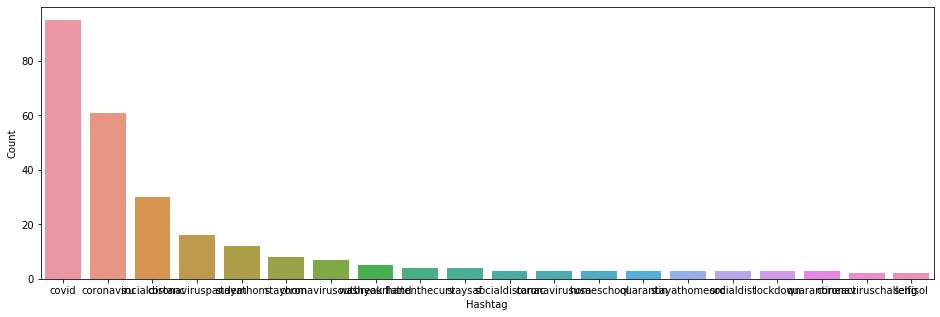

In [152]:
# Remedy Tweets
b = nltk.FreqDist(HT_negative) 
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())}) 
# selecting top 20 most frequent hashtags 
e = e.nlargest(columns="Count", n = 20)   
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

In [153]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim

In [154]:
#Bag-of-Words
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
bow = bow_vectorizer.fit_transform(combi['tidy_tweet']) 
bow.shape

(164185, 1000)

In [155]:
#TF-IDF Features
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(164185, 1000)

In [156]:
#Word2Vec Features

tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 

model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

(39939321, 50630260)

In [157]:
model_w2v.wv.most_similar(positive="sanit")

[('hand', 0.6692397594451904),
 ('clorex', 0.6325894594192505),
 ('disinfect', 0.6224839091300964),
 ('antisept', 0.5996959209442139),
 ('santiz', 0.5937144160270691),
 ('impost', 0.5923600196838379),
 ('qpnok', 0.5908060073852539),
 ('sanitis', 0.5898149609565735),
 ('soap', 0.5837588906288147),
 ('wildry', 0.5832505822181702)]

In [158]:
model_w2v.wv.most_similar(positive="trump")

[('donald', 0.6899479627609253),
 ('#trump', 0.6260346174240112),
 ('presid', 0.6009917855262756),
 ('lyin', 0.5990639925003052),
 ('penc', 0.5982765555381775),
 ('#foxnewsliedaspeopledi', 0.5826215744018555),
 ('apprentic', 0.5753520727157593),
 ('excori', 0.5743943452835083),
 ('#dumbestpotusev', 0.572921633720398),
 ('inflam', 0.5724745988845825)]

In [159]:
model_w2v['covid']

C:\Users\kunal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 1.49858177e-01,  4.53809917e-01,  2.63963580e-01, -1.01591073e-01,
       -2.29612321e-01,  5.34583330e-01,  1.42957315e-01,  1.86428666e-01,
        3.55832607e-01,  5.91170013e-01,  1.94656923e-01, -3.11796546e-01,
       -3.07763636e-01,  1.76145285e-01, -1.73201412e-01,  5.07046729e-02,
        4.54673879e-02, -1.15335904e-01,  5.66576282e-03, -6.13009499e-04,
        8.13158229e-02, -1.49846062e-01, -2.99548358e-01, -5.27595758e-01,
       -1.78546891e-01,  5.96868852e-03, -2.86714315e-01, -2.65343376e-02,
       -4.94733155e-01, -3.73216085e-02, -2.26529852e-01,  2.17684284e-01,
       -9.87485573e-02, -1.59755334e-01,  3.54081422e-01,  2.67562568e-01,
        2.46354062e-02, -8.40227604e-02, -3.49915564e-01,  1.23552173e-01,
        1.23007677e-01, -1.87553272e-01, -3.76584649e-01,  4.77238782e-02,
       -1.59862220e-01, -1.89507365e-01, -2.02695832e-01, -9.13276672e-02,
        1.16669126e-01, -6.70062006e-02,  1.45620525e-01, -1.16262719e-01,
        1.60381198e-01,  

In [160]:
len(model_w2v['trump']) #The length of the vector is 200

C:\Users\kunal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


200

In [161]:
#Preparing Vectors for Tweets
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary                                     
            continue
    if count != 0:
        vec /= count
    return vec

In [162]:
#Preparing word2vec feature set
wordvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    wordvec_df = pd.DataFrame(wordvec_arrays) 
    wordvec_df.shape 

C:\Users\kunal\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


## Modeling

In [163]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score

In [164]:
p=0.17

In [165]:
#Bag-of-Words Features
# Extracting train and test BoW features 
train_bow = bow[:1700,:] 
test_bow = bow[1700:,:] 
# splitting data into training and validation set 
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['Label'],                                                            random_state=42,                                                           test_size=0.3)
lreg = LogisticRegression()
# training the model 
lreg.fit(xtrain_bow, ytrain) 
prediction = lreg.predict_proba(xvalid_bow) 
# predicting on the validation set 
prediction_int = prediction[:,1] >= p
# if prediction is greater than or equal to 0.3 than 1 else 0 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int) # calculating f1 score for the validation set

0.39080459770114945

In [129]:
#test=pd.read_csv('US_covid19Tweets.csv')

In [168]:
test_pred = lreg.predict_proba(test_bow) 
test_pred_int = test_pred[:,1] >= 0.3 
test_pred_int = test_pred_int.astype(np.int) 
test['label'] = test_pred_int 
submission = test[['label']] 
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

In [117]:
#TF-IDF Features
train_tfidf = tfidf[:1700,:] 
test_tfidf = tfidf[1700:,:] 
xtrain_tfidf = train_tfidf[ytrain.index] 
xvalid_tfidf = train_tfidf[yvalid.index]
lreg.fit(xtrain_tfidf, ytrain) 
prediction = lreg.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= p
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int) # calculating f1 score for the validation set

0.3050847457627119

In [124]:
#word2vec
train_w2v = wordvec_df.iloc[:31962,:] 
test_w2v = wordvec_df.iloc[31962:,:] 
xtrain_w2v = train_w2v.iloc[ytrain.index,:] 
xvalid_w2v = train_w2v.iloc[yvalid.index,:]
lreg.fit(xtrain_w2v, ytrain) 
prediction = lreg.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.15
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)


0.32

In [64]:
#SVM
from sklearn import svm
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain) 
prediction = svc.predict_proba(xvalid_bow) 
prediction_int = prediction[:,1] >= 0. 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.11538461538461539

In [65]:
#TF-IDF Features
svc = svm.SVC(kernel='linear', 
C=1, probability=True).fit(xtrain_tfidf, ytrain) 
prediction = svc.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.15384615384615385

In [67]:
#Word2Vec Features
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain) 
prediction = svc.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.08333333333333334

In [68]:
#Bag-of-Words Features
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain) 
prediction = rf.predict(xvalid_bow) 
# validation score 
f1_score(yvalid, prediction)

0.11764705882352941

In [69]:
#TF-IDF Features
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain) 
prediction = rf.predict(xvalid_tfidf) 
f1_score(yvalid, prediction)

0.0

In [70]:
#Word2Vec Features
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_w2v, ytrain) 
prediction = rf.predict(xvalid_w2v)
f1_score(yvalid, prediction)

0.08333333333333334

In [75]:
# XGB
# Bag-of-Words Features
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth=10, n_estimators=1000).fit(xtrain_bow, ytrain) 
prediction = xgb_model.predict(xvalid_bow) 
f1_score(yvalid, prediction)

0.22222222222222218

In [77]:
#TF-IDF Features
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain) 
prediction = xgb.predict(xvalid_tfidf) 
f1_score(yvalid, prediction)

0.10714285714285715

In [78]:
#Word2Vec Features
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_w2v, ytrain) 
prediction = xgb.predict(xvalid_w2v) 
f1_score(yvalid, prediction)

0.15999999999999998

In [80]:
## FineTuning XGBoost + Word2Vec

In [79]:
import xgboost as xgb

In [81]:
dtrain = xgb.DMatrix(xtrain_w2v, label=ytrain) 
dvalid = xgb.DMatrix(xvalid_w2v, label=yvalid) 
dtest = xgb.DMatrix(test_w2v)

C:\Users\kunal\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [82]:
# Parameters that we are going to tune 
params = {
    'objective':'binary:logistic',
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1
 }

In [83]:
def custom_eval(preds, dtrain):
    labels = dtrain.get_label().astype(np.int)
    preds = (preds >= 0.3).astype(np.int)
    return [('f1_score', f1_score(labels, preds))]

In [84]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(6,10)
     for min_child_weight in range(5,8)
 ]
max_f1 = 0. # initializing with 0 
best_params = None 
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
     # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight

     # Cross-validation
    cv_results = xgb.cv(        params,
        dtrain,        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )     

CV with max_depth=6, min_child_weight=5
CV with max_depth=6, min_child_weight=6
CV with max_depth=6, min_child_weight=7
CV with max_depth=7, min_child_weight=5
CV with max_depth=7, min_child_weight=6
CV with max_depth=7, min_child_weight=7
CV with max_depth=8, min_child_weight=5
CV with max_depth=8, min_child_weight=6
CV with max_depth=8, min_child_weight=7
CV with max_depth=9, min_child_weight=5
CV with max_depth=9, min_child_weight=6
CV with max_depth=9, min_child_weight=7


In [85]:
# Finding best F1 Score
    
mean_f1 = cv_results['test-f1_score-mean'].max()

In [86]:
boost_rounds = cv_results['test-f1_score-mean'].argmax()    
print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))    
if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (max_depth,min_child_weight) 

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

	F1 Score 0.2829836 for 4 rounds
Best params: 9, 7, F1 Score: 0.2829836


C:\Users\kunal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


In [88]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(5,10)]
    for colsample in [i/10. for i in range(5,10)] ]
max_f1 = 0. 
best_params = None 
for subsample, colsample in gridsearch_params:
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
     # Update our parameters
    params['colsample'] = colsample
    params['subsample'] = subsample
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )
     # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (subsample, colsample) 

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

CV with subsample=0.5, colsample=0.5


C:\Users\kunal\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


	F1 Score 0.2680796 for 20 rounds
CV with subsample=0.5, colsample=0.6
	F1 Score 0.2680796 for 20 rounds
CV with subsample=0.5, colsample=0.7
	F1 Score 0.2680796 for 20 rounds
CV with subsample=0.5, colsample=0.8
	F1 Score 0.2680796 for 20 rounds
CV with subsample=0.5, colsample=0.9
	F1 Score 0.2680796 for 20 rounds
CV with subsample=0.6, colsample=0.5
	F1 Score 0.31743160000000004 for 4 rounds
CV with subsample=0.6, colsample=0.6
	F1 Score 0.31743160000000004 for 4 rounds
CV with subsample=0.6, colsample=0.7
	F1 Score 0.31743160000000004 for 4 rounds
CV with subsample=0.6, colsample=0.8
	F1 Score 0.31743160000000004 for 4 rounds
CV with subsample=0.6, colsample=0.9
	F1 Score 0.31743160000000004 for 4 rounds
CV with subsample=0.7, colsample=0.5
	F1 Score 0.2938144 for 26 rounds
CV with subsample=0.7, colsample=0.6
	F1 Score 0.2938144 for 26 rounds
CV with subsample=0.7, colsample=0.7
	F1 Score 0.2938144 for 26 rounds
CV with subsample=0.7, colsample=0.8
	F1 Score 0.2938144 for 26 round